In [9]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so
from utils.process_results import merge_results
from seaborn import axes_style
theme_dict = {**axes_style("whitegrid"), "grid.linestyle": ":"}
so.Plot.config.theme.update(theme_dict)


In [10]:
save_dir = "/Users/mathildepro/Documents/code_projects/thèse/65e866b7820acddda61c590e/chap_Understanding/graphs_jetson/"
save_dir = "/Users/mathildepro/Documents/code_projects/ai-energy-consumption-framework/Jetson/graphs/"

In [27]:
log_dir = "/home/mjay/ai-energy-consumption/Jetson/logs"
log_dir = "/Users/mathildepro/Documents/code_projects/ai-energy-consumption-framework/Jetson/logs"
tensorboard_all, energy = pd.DataFrame(), pd.DataFrame()
for sum_name in ["experiment_summary.csv"]: # experiment_summary_daytests experiment_summary experiment_summary_power
    print(sum_name)
    exp_summary, tb, nrg = merge_results(log_dir, os.path.join(log_dir, sum_name))
    tensorboard_all = pd.concat([tensorboard_all, tb], join="outer")
    energy = pd.concat([energy, nrg], join="outer")
    

experiment_summary.csv
Processing 20240419_190758
Processing 20240422_190135
Processing 20240423_093905
Processing 20240423_190801
Processing 20240424_093443
Directory not found for 20240424_093443
Processing 20240430_100107
Processing 20240430_114502
Processing 20240715_144333
Directory not found for 20240715_144333
Processing 20240715_153559
Processing 20240719_181354
Processing 20240723_132409


In [28]:
drop_col = {"user_command", "cmd0", "cmd1", "exp_csv", "tegra_script", "jetson_data", "log_dir", "resources_selection", "training_dir", "train_repo", "repo", "bash_log", "environment_dsc_file", "storage_group"}
exp_summary.drop(columns=drop_col).style.background_gradient(cmap='viridis', low=0.2, high=0.2, axis=0)

,jobname,nodecount,walltime,site,reservation,jobid,sleep_time,batch_size,epochs,arch,printfreq,evalfreq,earlystop,resolution,lr,power_mode,seed,date_exp
0,resnet,1,63:00:00,toulouse,2024-04-19 19:00:00,450507,60,192,20000000000,resnet50,10,500,20000,256,0.001000,MODE_30W_ALL,528,20240419_190758
1,resnet,1,16:00:00,toulouse,2024,450551,60,192,20000000000,resnet50,10,500,20000,256,0.001000,MODE_30W_ALL,6601,20240422_190135
2,resnet,1,6:00:00,toulouse,2024,450555,60,192,20000000000,resnet50,10,500,20000,256,0.001000,MODE_30W_ALL,3972,20240423_093905
3,resnet,1,16:00:00,toulouse,2024-04-23 19:00:00,450561,60,192,20000000000,resnet50,10,500,20000,256,0.001000,MODE_30W_ALL,8931,20240423_190801
5,resnet,1,168:00:00,toulouse,2024,450670,60,192,20000000000,resnet50,100,500,20000,256,0.001000,MODE_30W_ALL,9078,20240430_100107
6,resnet,1,168:00:00,toulouse,2024,450672,60,192,20000000000,resnet50,100,500,20000,256,0.001000,MODE_30W_ALL,6543,20240430_114502
8,resnet,1,10:00:00,toulouse,2024,452095,60,192,20000000000,resnet50,100,500,20000,256,0.001000,MODE_30W_ALL,4367,20240715_153559
9,resnet,1,10:00:00,toulouse,./images/jetson_resnet.yaml,452162,60,192,20000000000,resnet50,100,500,10000,224,0.001000,MODE_30W_ALL,7451,20240719_181354
10,resnet,1,10:00:00,toulouse,./images/jetson_resnet.yaml,452388,60,192,20000000000,resnet50,100,500,10000,224,0.001000,MODE_30W_ALL,6558,20240723_132409


In [30]:
date_exp_ls = exp_summary["date_exp"][-4:]
date_exp_ls

6     20240430_114502
8     20240715_153559
9     20240719_181354
10    20240723_132409
Name: date_exp, dtype: object

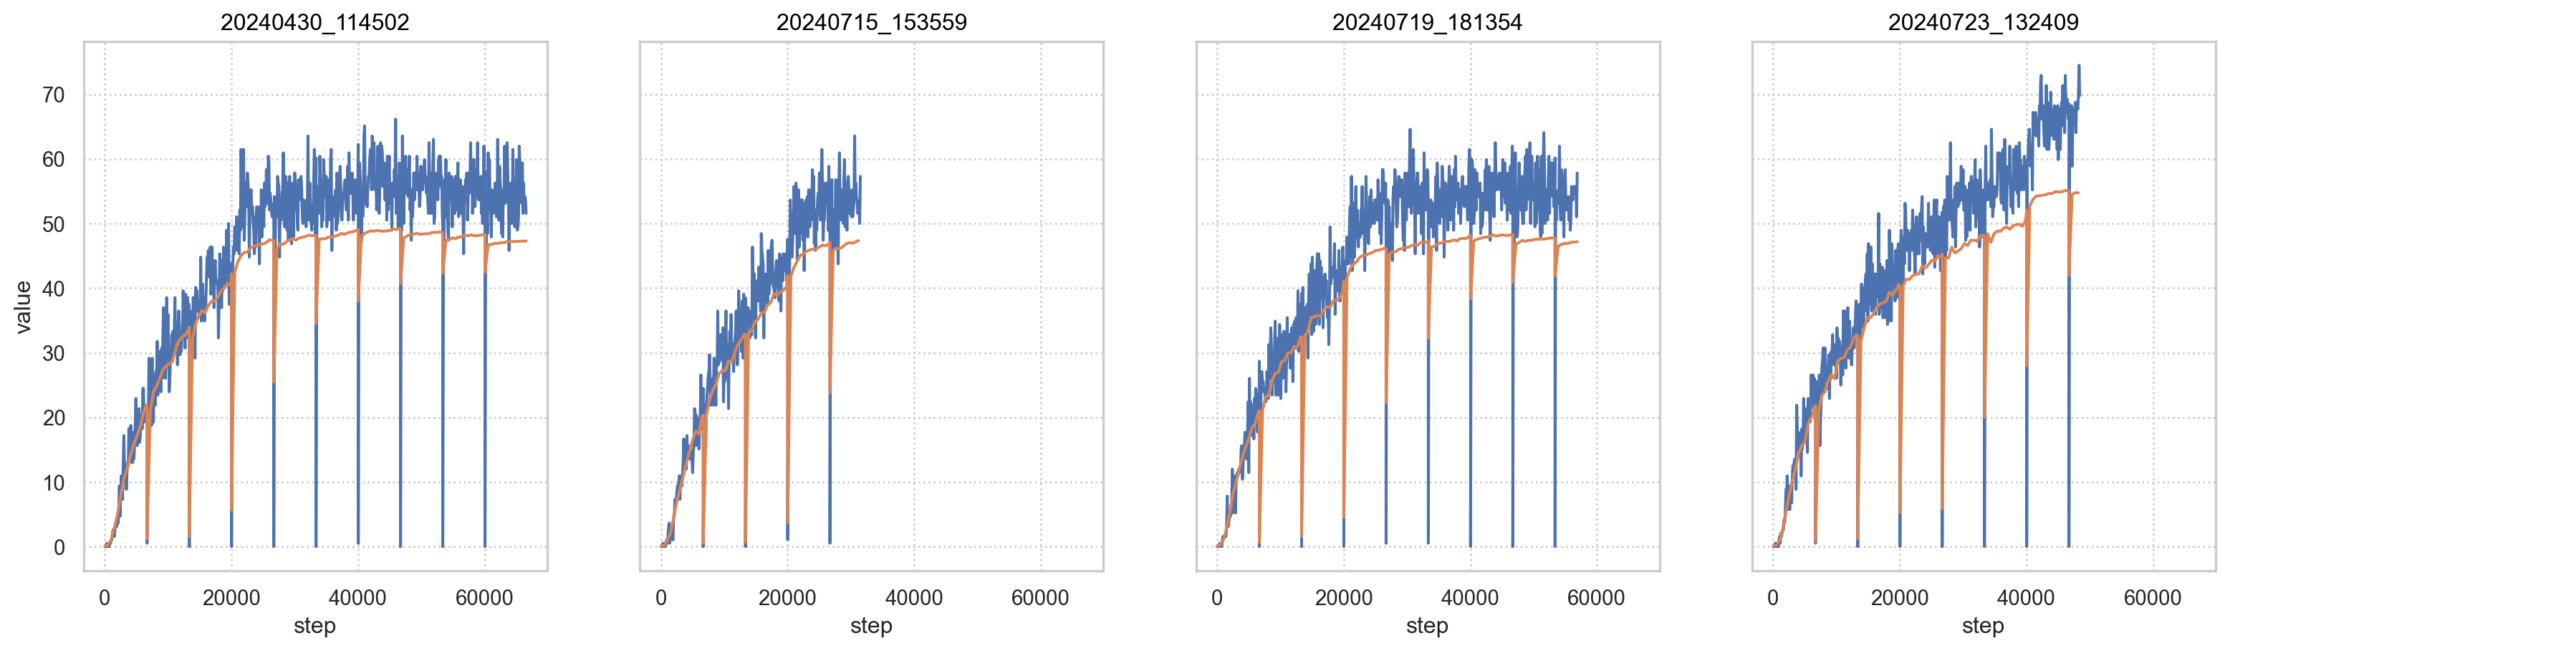

In [42]:
metrics = ["Accuracy"]
f = plt.Figure(figsize=(20, 5))
(
    so.Plot(tensorboard_all[(tensorboard_all["metric"].isin(metrics))&(tensorboard_all["date_exp"].isin(date_exp_ls))], x="step", y="value", color="phase"
            )
    .add(so.Line())
    .facet(col="date_exp")
    .on(f)
    # .scale(y="log")
)

In [44]:
date_exp = "20240723_132409"
tensorboard = tensorboard_all[tensorboard_all["date_exp"] == date_exp]
energy = energy[energy["date_exp"] == date_exp]
exp_summary = exp_summary[exp_summary["date_exp"] == date_exp]

In [96]:
exp_summary.T

,10
jobname,resnet
nodecount,1
walltime,10:00:00
resources_selection,-t exotic -p estats-1
site,toulouse
reservation,./images/jetson_resnet.yaml
environment_dsc_file,energyfl
storage_group,/home/mjay/jetson-inference
train_repo,/home/mjay/jetson-inference/python/training/cl...
training_dir,/home/mjay/ai-energy-consumption/Jetson


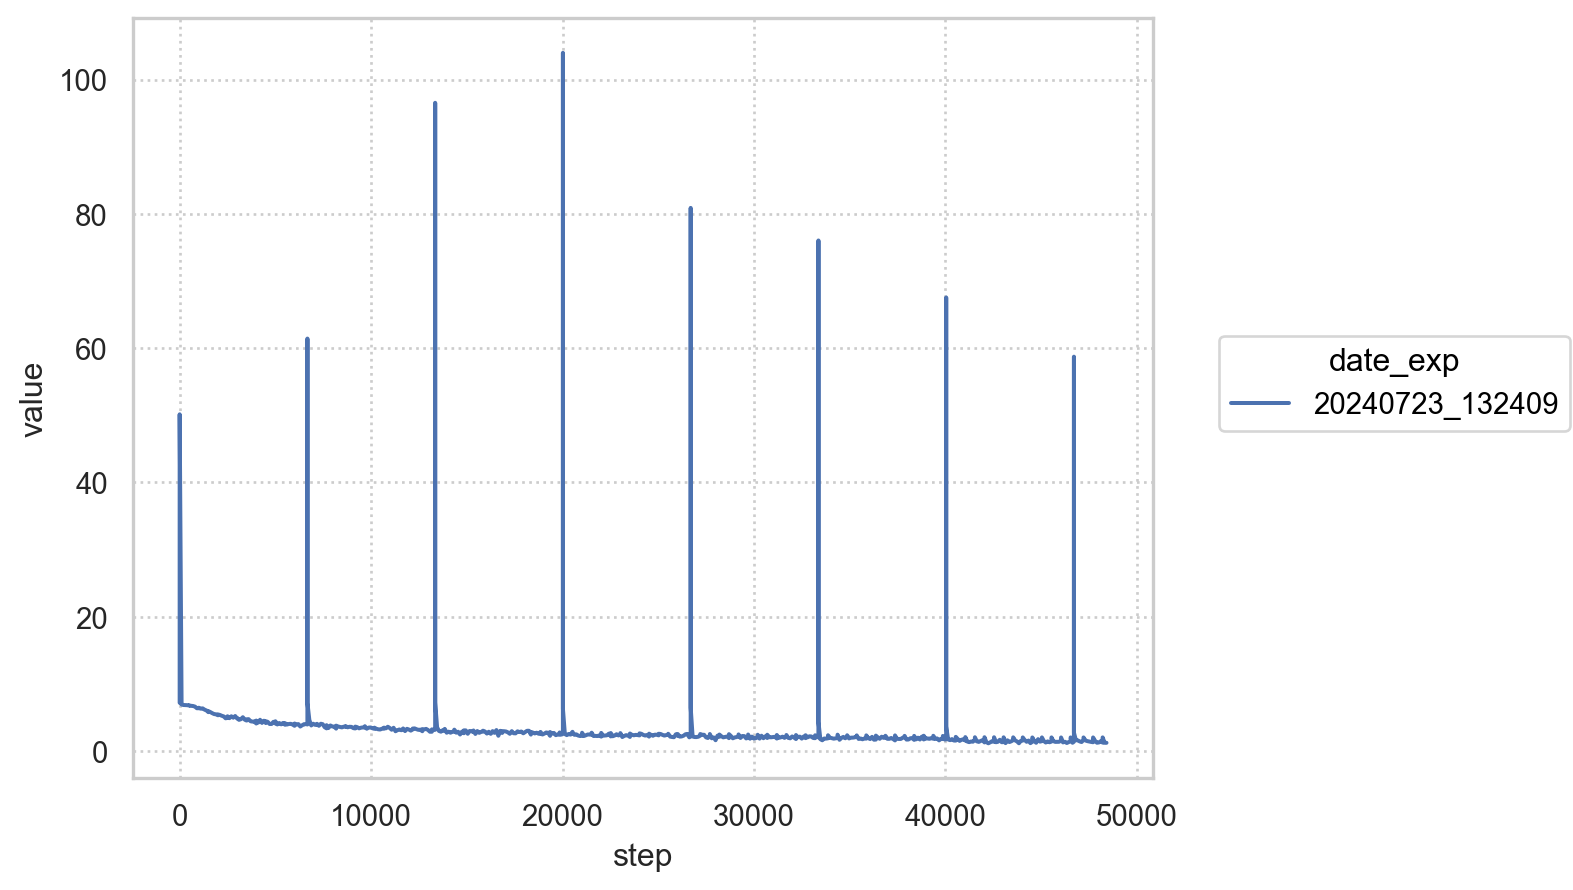

In [45]:
metrics = ["Loss"]
(
    so.Plot(tensorboard[(tensorboard["metric"].isin(metrics))], x="step", y="value", color="date_exp"
            )
    .add(so.Line())
    # .scale(y="log")
)

In [46]:
energy = energy.drop(index=381710)

KeyError: '[381710] not found in axis'

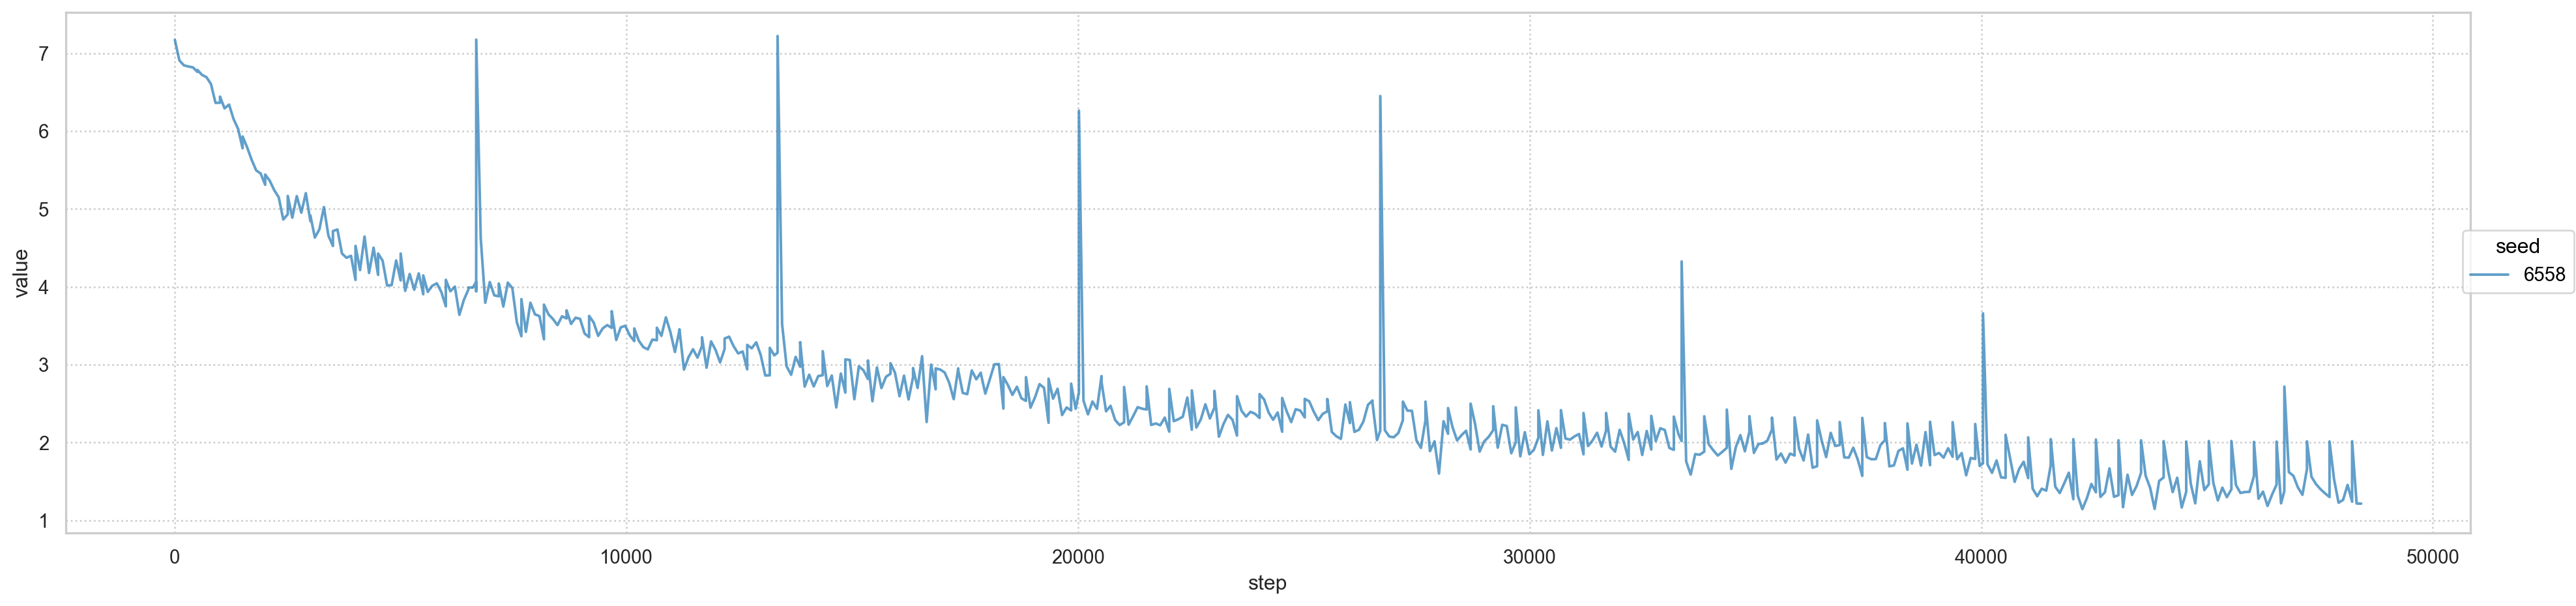

In [47]:
f = plt.Figure(figsize=(20, 5))
metrics = ["Loss"]
(
    so.Plot(tensorboard[(tensorboard["metric"].isin(metrics)&(tensorboard["value"]<10))], x="step", y='value', color="seed")
    # .facet(row="batch_size", col="node")
    .add(so.Line(alpha=0.7))
    .scale(color="tab10")
    .layout(engine="tight")
    .on(f)
)

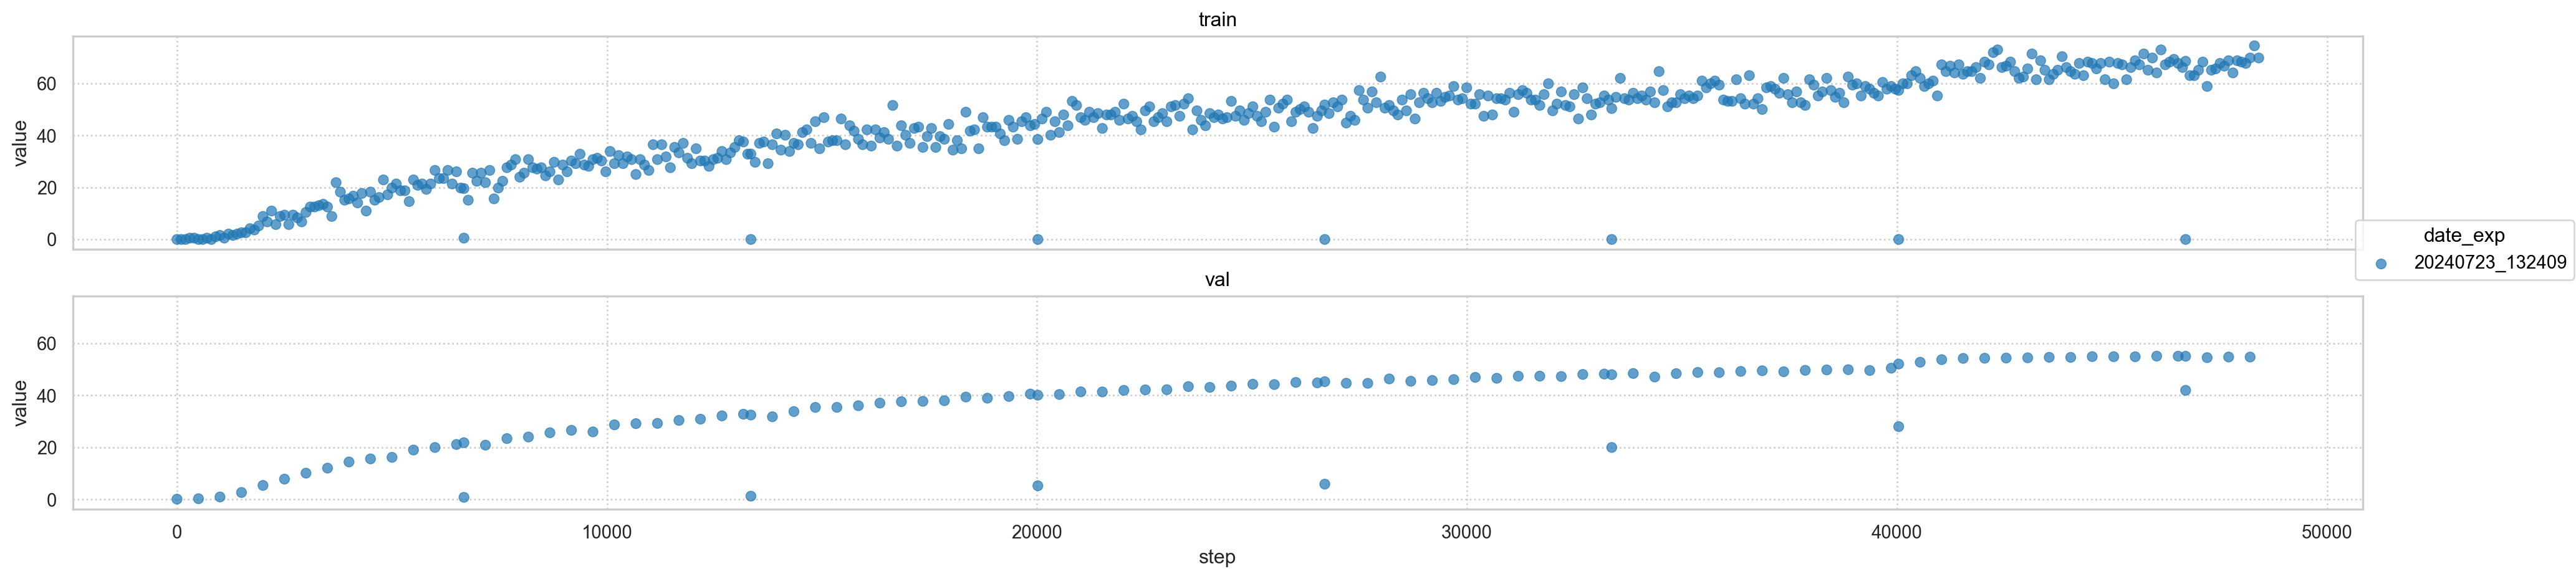

In [48]:
f = plt.Figure(figsize=(20, 5))
metrics = ["Accuracy"]
(
    so.Plot(tensorboard[(tensorboard["metric"].isin(metrics))], x='step', y='value', color="date_exp")
    .facet(row="phase")
    .add(so.Dot(alpha=0.7))
    .scale(color="tab10")
    .layout(engine="tight")
    .on(f)
)

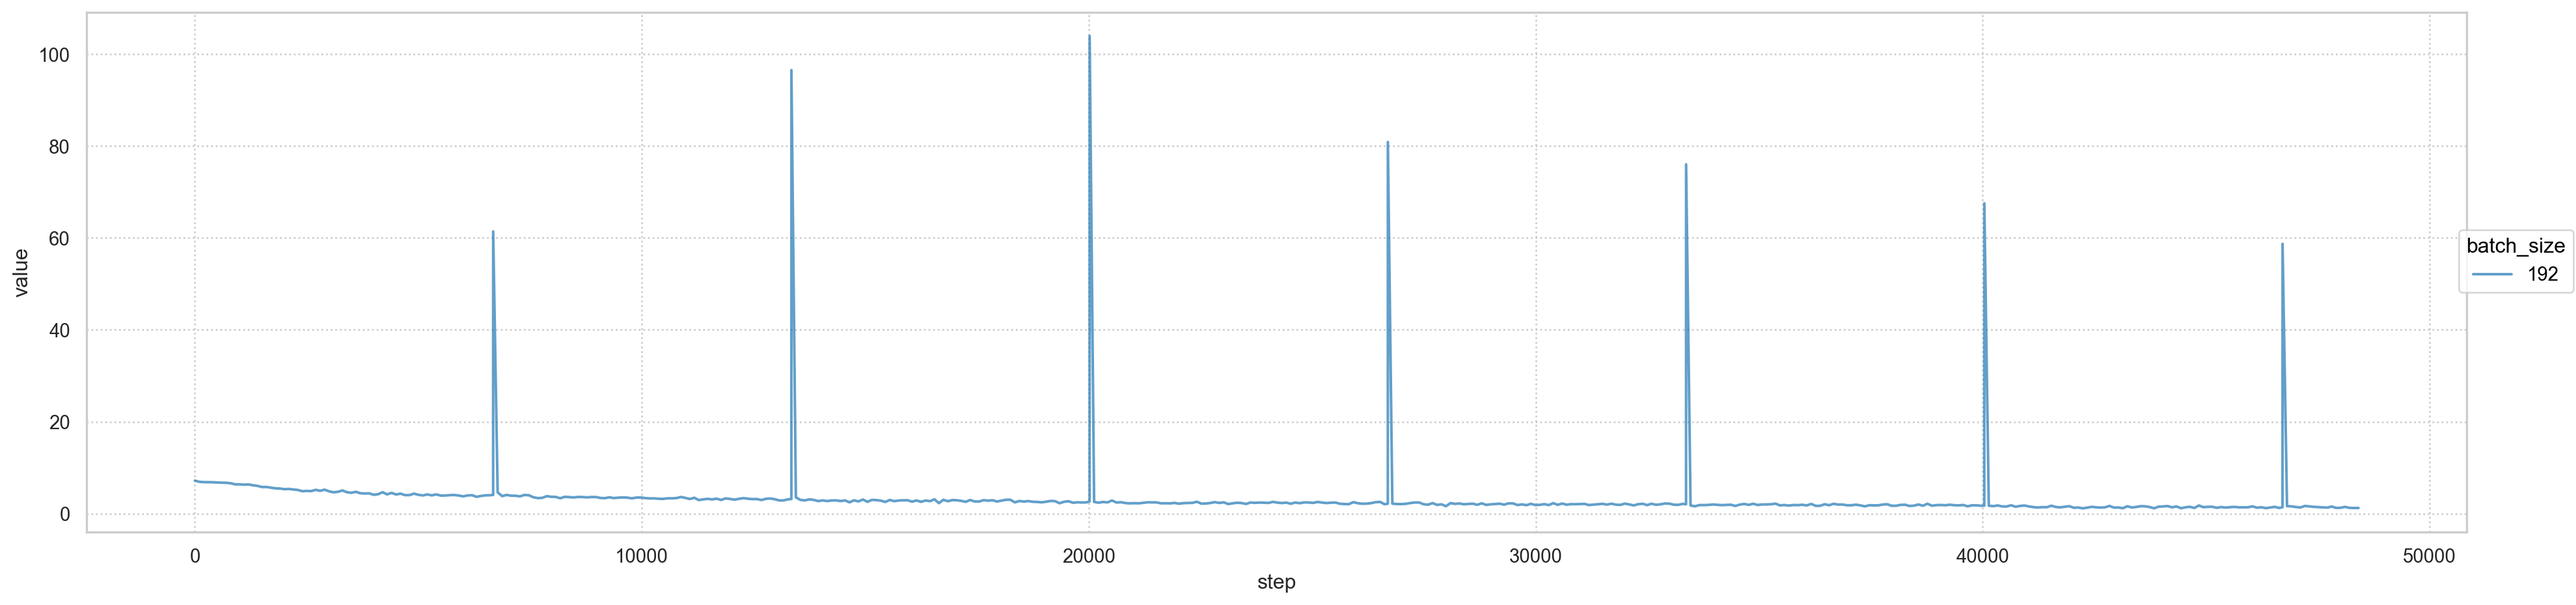

In [49]:
# plot_tb = tensorboard[(tensorboard["metric"].isin(metrics)&(tensorboard["value"]<10))]
c1 = tensorboard["metric"]=="Loss"
c2 = tensorboard["phase"]=="train"
# estats = ["estats-5", "estats-9"]
# c3 = tensorboard["node"].isin(estats)

plot_tb = tensorboard[(c1) & (c2)] # & (c3)]

f = plt.Figure(figsize=(20, 5))
(
    so.Plot(plot_tb, x='step', y='value', color="batch_size")
    # .facet(row="node")
    .add(so.Line(alpha=0.7))
    .scale(color="tab10")
    .layout(engine="tight")
    .on(f)
)

In [50]:
timetb = tensorboard[tensorboard["metric"]=="Timestamp_step"][["step", "value"]].rename(columns={"value":"timestamp"})
acctb = tensorboard[(tensorboard["metric"]=="Accuracy")&(tensorboard["phase"]=="train")][["step", "value", "phase"]].rename(columns={"value":"accuracy"})
tb = timetb.merge(acctb, on="step")

In [51]:
tensorboard[(tensorboard["metric"]=="Timestamp")].phase.unique()

array(['val'], dtype=object)

In [52]:
timetb = tensorboard[tensorboard["metric"]=="Timestamp"][["step", "value"]].rename(columns={"value":"timestamp"})
acctb = tensorboard[(tensorboard["metric"]=="Accuracy")&(tensorboard["phase"]=="val")][["step", "value", "phase"]].rename(columns={"value":"accuracy"})
tb = pd.concat([tb, timetb.merge(acctb, on="step")])

In [53]:

tb.sort_values("timestamp")

,step,timestamp,accuracy,phase
0,1,1.721734e+09,0.000000,train
0,1,1.721734e+09,0.100000,val
1,101,1.721735e+09,0.000000,train
2,201,1.721735e+09,0.000000,train
3,301,1.721736e+09,0.520833,train
...,...,...,...,...
490,48112,1.722008e+09,67.708336,train
491,48212,1.722008e+09,69.791672,train
108,48212,1.722008e+09,54.748001,val
492,48312,1.722009e+09,74.479172,train


In [54]:
tb["timestamp"] = tb.apply(lambda x: x["timestamp"] if x["phase"]=="train" else x["timestamp"]+1, axis=1)

In [55]:
tb.groupby("timestamp").count()

,step,accuracy,phase
timestamp,,,
1.721734e+09,1,1,1
1.721734e+09,1,1,1
1.721735e+09,1,1,1
1.721735e+09,1,1,1
1.721736e+09,1,1,1
...,...,...,...
1.722008e+09,1,1,1
1.722008e+09,1,1,1
1.722008e+09,1,1,1


In [56]:
tb = tb.map(lambda x: "Train" if x=="train" else x)
tb = tb.map(lambda x: "Test" if x=="val" else x)

In [61]:
tb["datetime"] = pd.to_datetime(tb["timestamp"], unit="s")

from datetime import datetime
def convert_str_to_sec(s):
    flt = ".%f" if "." in s else ""
    if "+01" in s:
        pls="+01:00"
    elif "+02" in s:
        pls="+02:00"
    else:
        pls=""
    pattern = f"%Y-%m-%d %H:%M:%S{flt}{pls}"
    return datetime.strptime(
                s, 
                pattern
                )

datetime_format = "%Y-%m-%d %H:%M:%S.%f"
energy["datetime"] = energy["timestamp"].apply(convert_str_to_sec)

In [62]:
energy.columns

Index(['timestamp', 'RAM%', 'GPU%', 'GPU inst power (mW)',
       'GPU avg power (mW)', 'CPU%', 'CPU inst power (mW)',
       'CPU avg power (mW)', 'tot inst power (mW)', 'tot avg power (mW)',
       'date_exp', 'jobname', 'nodecount', 'walltime', 'resources_selection',
       'site', 'reservation', 'environment_dsc_file', 'storage_group',
       'train_repo', 'training_dir', 'repo', 'tegra_script', 'jetson_data',
       'bash_log', 'exp_csv', 'jobid', 'cmd0', 'cmd1', 'sleep_time',
       'batch_size', 'epochs', 'arch', 'printfreq', 'evalfreq', 'earlystop',
       'resolution', 'lr', 'power_mode', 'seed', 'log_dir', 'user_command',
       'datetime'],
      dtype='object')

In [120]:
energy["RAM%"].mean()

68.63616835214758

In [63]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.style.use('seaborn-v0_8-whitegrid')

# tex_fonts = {
#     # Use LaTeX to write all text
#     "text.usetex": True,
#     "font.family": "serif",
#     # Use 10pt font in plots, to match 10pt font in document
#     "axes.labelsize": 12,
#     "font.size": 12,
#     # Make the legend/label fonts a little smaller
#     "legend.fontsize": 10,
#     "xtick.labelsize": 10,
#     "ytick.labelsize": 10
# }

# plt.rcParams.update(tex_fonts)

from seaborn import axes_style
theme_dict = {**axes_style("whitegrid"), "grid.linestyle": ":"}


In [64]:
inst_power_col = [col for col in energy.columns if "inst power" in col]

power_col = []
energy = energy.set_index("datetime")

for col in inst_power_col:
    new_col = " ".join(col.split(" ")[:-1])+" (W)"
    energy[new_col] = energy[col]/1000
    energy[new_col] = energy[new_col].rolling(window="30s").mean()
    power_col.append(new_col)

energy = energy.reset_index()
melt_energy = energy.melt(id_vars=["datetime"], value_vars=power_col, value_name="power (W)")
melt_energy["variable"] = melt_energy["variable"].map(lambda x: x.split(" ")[0])
melt_energy["variable"] = melt_energy["variable"].map(lambda x: "Total" if x=="tot" else x)

utilisation_col = ["CPU%", "GPU%"]

energy = energy.set_index("datetime")

for col in utilisation_col:
    energy[col] = energy[col]/100
    energy[col] = energy[col].rolling(window="30s").mean()

energy = energy.reset_index()
melt_util = energy.melt(id_vars=["datetime"], value_vars=utilisation_col, value_name="Utilization (%)")
melt_util = melt_util.map(lambda x: x[:-1] if type(x)==str and x[-1]=="%" else x)

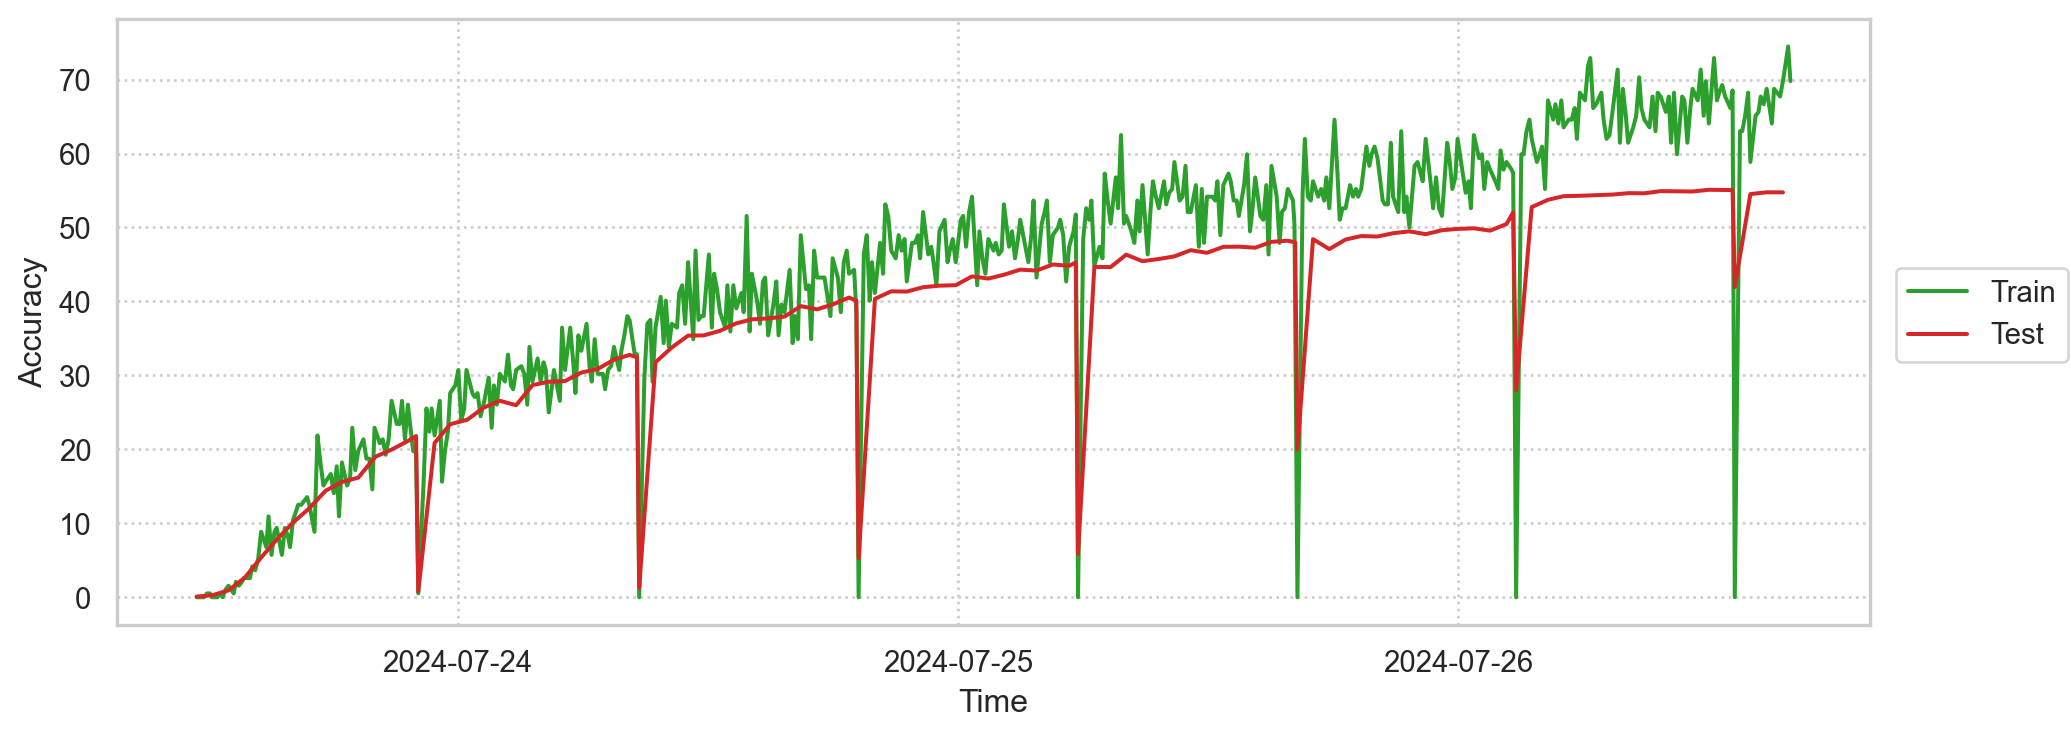

In [65]:
f = plt.Figure(figsize=(10, 4))
(
    so.Plot(tb.reset_index(), x="datetime", y="accuracy", color="phase")
    .add(so.Line())
    .scale(color=["tab:green", "tab:red"])
    .on(f)
    .theme(theme_dict)
    .label(
        x="Time",
        y = "Accuracy",
        color=None)
    .layout(engine="tight")
    .plot()
    .save(save_dir+"acc.pdf", bbox_inches='tight', dpi=300, 
          edgecolor=None)
)

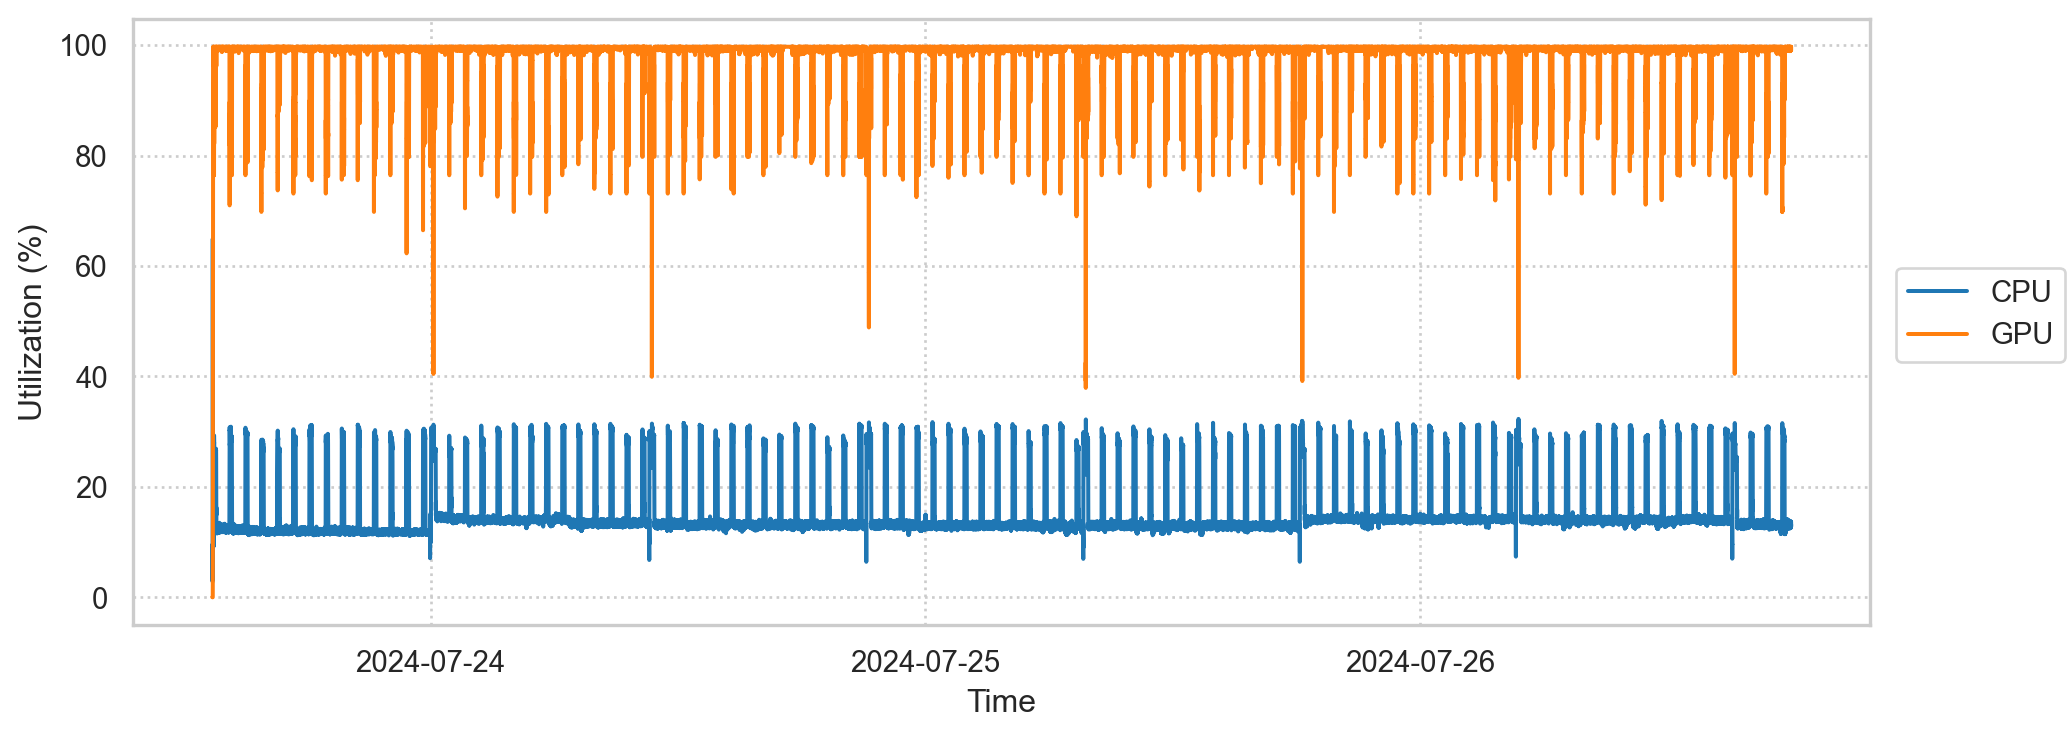

In [66]:
f = plt.Figure(figsize=(10, 4))

(
    so.Plot(melt_util.sort_values("variable"), x="datetime", y="Utilization (%)", color="variable")
    .add(so.Line())
    .on(f)
    .theme(theme_dict)
    .label(
        x="Time",
        y = "Utilization (%)",
        color=None,
    )
    .scale(color = ["tab:blue", "tab:orange"])
    .layout(engine="tight")
    .plot()
    .save(save_dir+"util.pdf", bbox_inches='tight', dpi=300, 
          edgecolor=None)
)


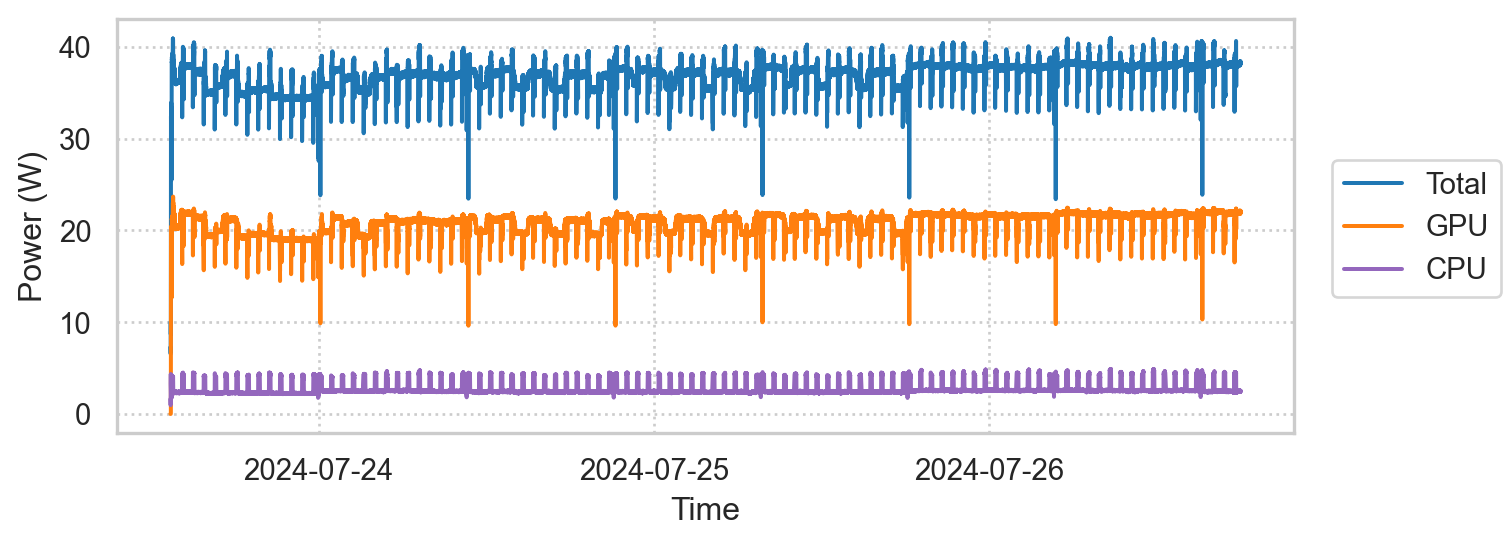

In [69]:
f = plt.Figure(figsize=(7, 3))
(
    so.Plot(melt_energy.sort_values("variable", ascending=False), x="datetime", y="power (W)", color="variable")
    .add(so.Line())
    .on(f)
    .theme(theme_dict)
    .label(
        x="Time",
        y = "Power (W)",
        color=None,
    )
    .layout(engine="tight")
    .scale(color = ["tab:blue", "tab:orange", "tab:purple"])
    # .layout(engine="constrained")
    .plot()
    .save(save_dir+"power.pdf", bbox_inches='tight', dpi=300, 
          edgecolor=None)
)

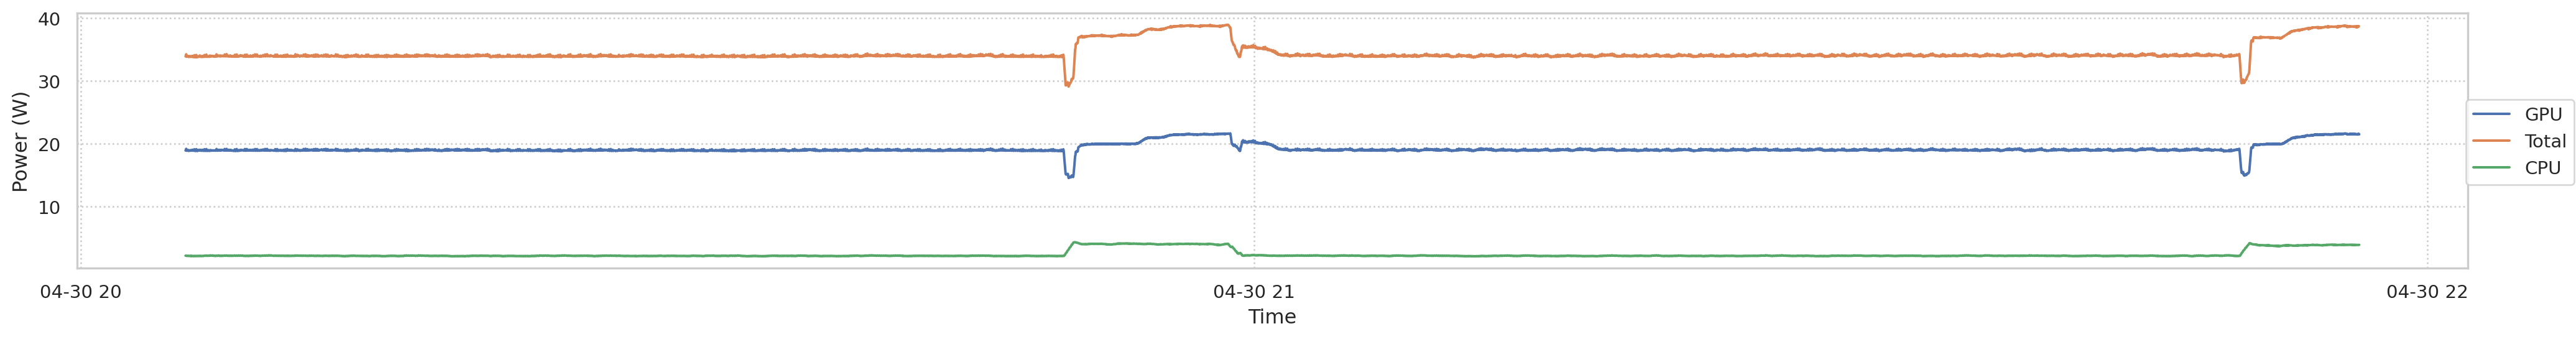

In [41]:
f = plt.Figure(figsize=(21, 3))
(
    so.Plot(melt_energy.sort_values("datetime")[90000:110000], x="datetime", y="power (W)", color="variable")
    .add(so.Line())
    .on(f)
    .theme(theme_dict)
    .label(
        x="Time",
        y = "Power (W)",
        color=None,
    )
    .layout(engine="tight")
    # .layout(engine="constrained")
)

In [30]:
energy.columns

Index(['datetime', 'timestamp', 'RAM%', 'GPU%', 'GPU inst power (mW)',
       'GPU avg power (mW)', 'CPU%', 'CPU inst power (mW)',
       'CPU avg power (mW)', 'tot inst power (mW)', 'tot avg power (mW)',
       'date_exp', 'jobname', 'nodecount', 'walltime', 'resources_selection',
       'site', 'reservation', 'environment_dsc_file', 'storage_group',
       'train_repo', 'training_dir', 'repo', 'tegra_script', 'jetson_data',
       'bash_log', 'exp_csv', 'jobid', 'cmd0', 'cmd1', 'sleep_time',
       'batch_size', 'epochs', 'arch', 'printfreq', 'evalfreq', 'earlystop',
       'resolution', 'lr', 'power_mode', 'seed', 'log_dir', 'user_command',
       'GPU inst power (W)', 'CPU inst power (W)', 'tot inst power (W)'],
      dtype='object')

In [71]:
# .apply(lambda x: x.total_seconds())
datetime_format = "%Y-%m-%d %H:%M:%S.%f"

from datetime import datetime

def convert_str_to_sec(s):
    flt = ".%f" if "." in s else ""
    if "+01" in s:
        pls="+01:00"
    elif "+02" in s:
        pls="+02:00"
    else:
        pls=""
    pattern = f"%Y-%m-%d %H:%M:%S{flt}{pls}"
    return datetime.strptime(
                s, 
                pattern
                ).timestamp()
    
energy["time"] = energy["timestamp"].apply(convert_str_to_sec)
energy = energy.merge(energy.groupby("date_exp").agg({"time": "min"}).rename(columns={"time":"exp_start_time"}), on="date_exp")
energy["time"] = energy["time"] - energy["exp_start_time"]
# energy["power_mode"] = energy["power_mode"].fillna("MODE_30W_ALL")

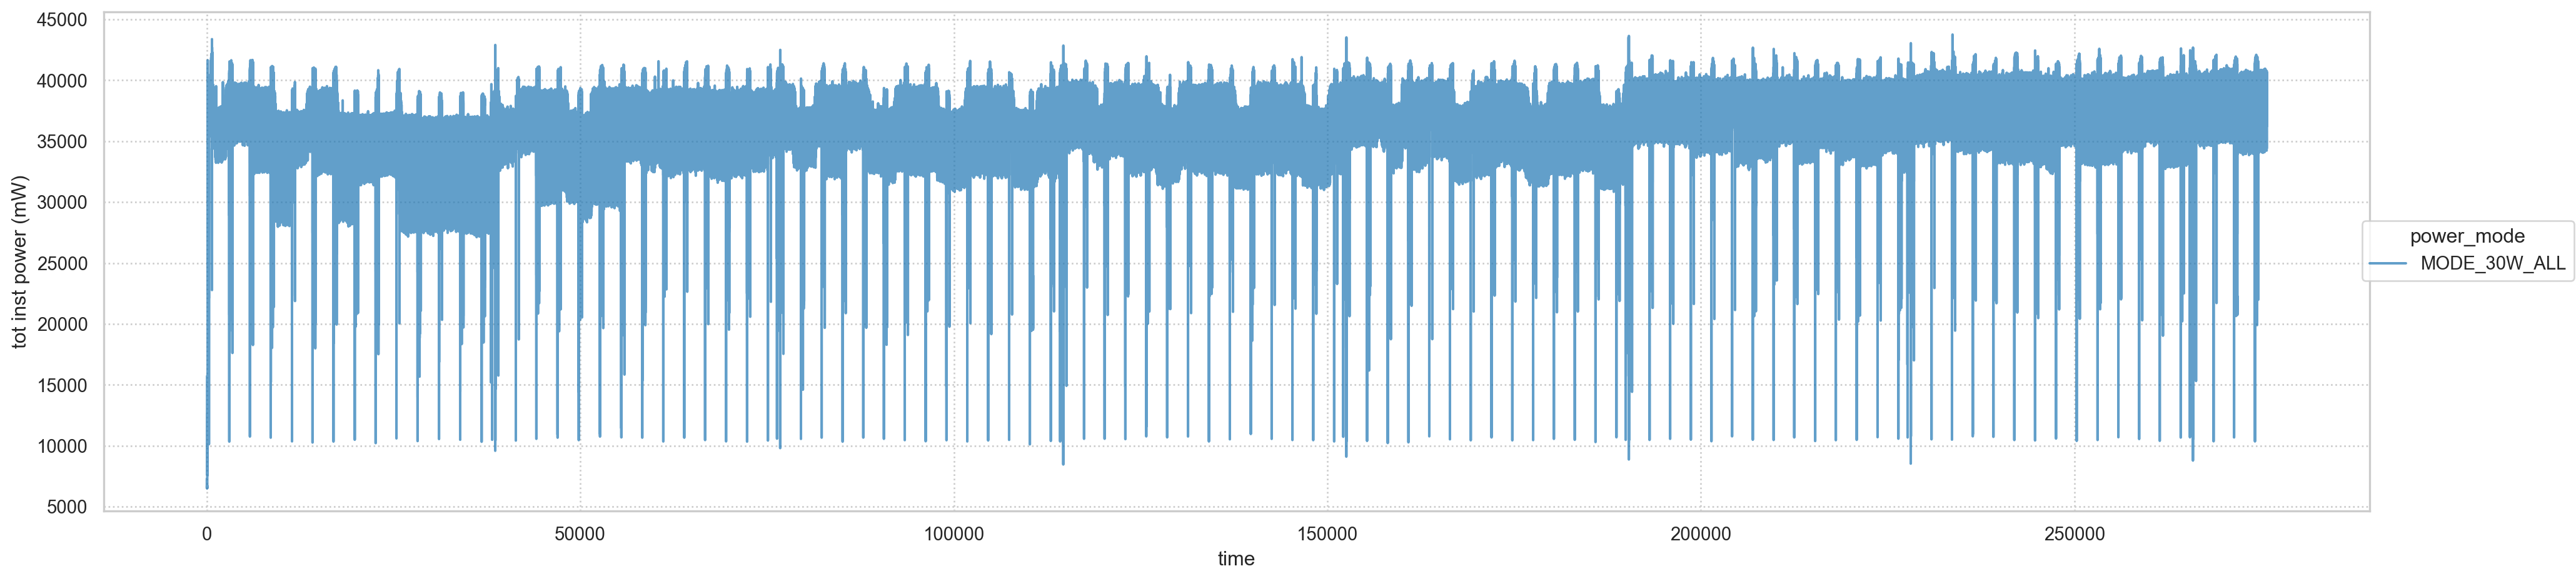

In [72]:
f = plt.Figure(figsize=(20, 5))
(
    so.Plot(energy, x='time', y='tot inst power (mW)', color="power_mode")
    # .facet(row="batch_size", col="node")
    .add(so.Line(alpha=0.7))
    .scale(color="tab10")
    .layout(engine="tight")
    .on(f)
)

In [73]:
energy.describe().T

,count,mean,min,25%,50%,75%,max,std
datetime,275589,2024-07-25 03:42:00.047145216,2024-07-23 13:24:12.929908,2024-07-24 08:33:06.498551040,2024-07-25 03:42:00.022184960,2024-07-25 22:50:53.628338944,2024-07-26 17:59:47.120510,NaN
RAM%,275589.0,68.636168,1.0,75.0,76.0,76.0,83.0,16.046341
GPU%,275589.0,97.783618,0.0,99.02,99.696667,99.7,99.753333,4.929357
GPU inst power (mW),275589.0,20849.790957,0.0,19810.0,21113.0,22439.0,28682.0,2328.465326
GPU avg power (mW),275589.0,20849.212443,0.0,20139.0,21090.0,21923.0,27614.0,1639.635143
CPU%,275589.0,15.923166,2.889333,12.993667,13.556,14.300333,64.919,5.866012
CPU inst power (mW),275589.0,2758.121217,955.0,2257.0,2730.0,2906.0,10012.0,843.761034
CPU avg power (mW),275589.0,2757.624259,955.0,2311.0,2572.0,2737.0,9924.0,742.032969
tot inst power (mW),275589.0,37044.681337,6514.0,35910.0,37478.0,38754.0,43760.0,2782.272567
tot avg power (mW),275589.0,37042.06513,6522.0,36174.0,37358.0,38178.0,42602.0,2055.720196


In [74]:
tensorboard.head()

,step,value,metric,phase,date_exp,jobname,nodecount,walltime,resources_selection,site,...,arch,printfreq,evalfreq,earlystop,resolution,lr,power_mode,seed,log_dir,user_command
207372,1,0.000000,Accuracy,train,20240723_132409,resnet,1,10:00:00,-t exotic -p estats-1,toulouse,...,resnet50,100,500,10000,224,0.001,MODE_30W_ALL,6558,/home/mjay/ai-energy-consumption/Jetson/logs/2...,cd /home/mjay/jetson-inference; python3 /home/...
207373,101,0.000000,Accuracy,train,20240723_132409,resnet,1,10:00:00,-t exotic -p estats-1,toulouse,...,resnet50,100,500,10000,224,0.001,MODE_30W_ALL,6558,/home/mjay/ai-energy-consumption/Jetson/logs/2...,cd /home/mjay/jetson-inference; python3 /home/...
207374,201,0.000000,Accuracy,train,20240723_132409,resnet,1,10:00:00,-t exotic -p estats-1,toulouse,...,resnet50,100,500,10000,224,0.001,MODE_30W_ALL,6558,/home/mjay/ai-energy-consumption/Jetson/logs/2...,cd /home/mjay/jetson-inference; python3 /home/...
207375,301,0.520833,Accuracy,train,20240723_132409,resnet,1,10:00:00,-t exotic -p estats-1,toulouse,...,resnet50,100,500,10000,224,0.001,MODE_30W_ALL,6558,/home/mjay/ai-energy-consumption/Jetson/logs/2...,cd /home/mjay/jetson-inference; python3 /home/...
207376,401,0.520833,Accuracy,train,20240723_132409,resnet,1,10:00:00,-t exotic -p estats-1,toulouse,...,resnet50,100,500,10000,224,0.001,MODE_30W_ALL,6558,/home/mjay/ai-energy-consumption/Jetson/logs/2...,cd /home/mjay/jetson-inference; python3 /home/...


In [75]:
tensorboard.pivot_table(index="metric", columns=["phase"], values="value", aggfunc=["mean", "max", "min"])

mean                                  max                \
phase            no_phase         train           val no_phase         train   
metric                                                                         
Accuracy              NaN  4.353835e+01  3.722112e+01      NaN  7.447917e+01   
Best_accuracy         NaN           NaN  3.571897e+01      NaN           NaN   
Duration              NaN           NaN  4.163708e+02      NaN           NaN   
Loss                  NaN  3.710492e+00  3.528799e+00      NaN  1.039863e+02   
Time                  NaN  5.477888e+00  1.593648e+00      NaN  1.937225e+02   
Timestamp             NaN           NaN  1.721873e+09      NaN           NaN   
Timestamp_end         NaN           NaN  1.721873e+09      NaN           NaN   
Timestamp_start       NaN  1.721734e+09           NaN      NaN  1.721734e+09   
Timestamp_step        NaN  1.721872e+09           NaN      NaN  1.722009e+09   
lr               0.000843           NaN           NaN    0.001           NaN   

                                   min                              
phase                     val no_phase         train           val  
metric                                                              
Accuracy         5.510000e+01      NaN  0.000000e+00  1.000000e-01  
Best_accuracy    5.510000e+01      NaN           NaN  1.000000e-01  
Duration         4.384051e+02      NaN           NaN  3.969873e+02  
Loss             5.014192e+01      NaN  1.142890e+00  1.999810e+00  
Time             1.678230e+00      NaN  4.344470e+00  1.519566e+00  
Timestamp        1.722008e+09      NaN           NaN  1.721734e+09  
Timestamp_end    1.722008e+09      NaN           NaN  1.721735e+09  
Timestamp_start           NaN      NaN  1.721734e+09           NaN  
Timestamp_step            NaN      NaN  1.721734e+09           NaN  
lr                        NaN   0.0001           NaN           NaN

In [76]:
df = tensorboard[(tensorboard["metric"]=="Timestamp_step")&(tensorboard["phase"]=="train")]
(df["value"].max()-df["value"].min())/60/60


76.44444444444444

In [77]:
((energy["datetime"].max()-energy["datetime"].min())).total_seconds()/60/60

76.59283072277778

In [107]:
training_start = datetime.strptime(
                "2024-07-23 13:25:10.552", 
                "%Y-%m-%d %H:%M:%S.%f")

(training_start-energy["datetime"].min()).seconds

57

# Computing Energy

In [78]:
energy["interval(sec)"] = energy["datetime"].diff().dt.total_seconds()


In [79]:
energy["interval(sec)"].mean()

1.0005304679521607

In [80]:
(energy["interval(sec)"]*energy["tot inst power (mW)"]/1000).sum()/3600/1000

2.837293491651079

In [ ]:
4.935/1.6

3.0843749999999996

In [81]:
train_max_acc = tb[tb["accuracy"]==tb[tb["phase"]=="Test"]["accuracy"].max()]["datetime"].values[0]
(energy[energy["datetime"]<train_max_acc]["interval(sec)"]*energy[energy["datetime"]<train_max_acc]["tot inst power (mW)"]/1000).sum()/3600/1000

2.609440928573213

In [82]:
train_max_acc = tb[tb["accuracy"]==tb[tb["phase"]=="Train"]["accuracy"].max()]["datetime"].values[0]
(energy[energy["datetime"]<train_max_acc]["interval(sec)"] * energy[energy["datetime"]<train_max_acc]["tot inst power (mW)"]/1000).sum()/3600/1000

2.7543061780739313

In [102]:
training_start - train_max_acc

UFuncTypeError: ufunc 'subtract' cannot use operands with types dtype('float64') and dtype('<M8[ns]')

In [ ]:
3.32/1.6

2.0749999999999997

# Energy vs Accuracy

In [83]:
energy["total_cumsum_mW"] = energy["tot inst power (mW)"].cumsum()

In [84]:
tb

,step,timestamp,accuracy,phase,datetime
0,1,1.721734e+09,0.000000,Train,2024-07-23 11:29:04
1,101,1.721735e+09,0.000000,Train,2024-07-23 11:44:00
2,201,1.721735e+09,0.000000,Train,2024-07-23 11:50:24
3,301,1.721736e+09,0.520833,Train,2024-07-23 11:58:56
4,401,1.721736e+09,0.520833,Train,2024-07-23 12:07:28
...,...,...,...,...,...
104,46711,1.721999e+09,55.058002,Test,2024-07-26 13:09:21
105,46712,1.722000e+09,41.948002,Test,2024-07-26 13:15:45
106,47212,1.722002e+09,54.518002,Test,2024-07-26 14:00:33
107,47712,1.722005e+09,54.758003,Test,2024-07-26 14:47:29


In [85]:
tb["Best_accuracy"] = tb.apply(lambda x: tb[(tb["datetime"]<=x["datetime"])&(tb["phase"]==x.phase)]["accuracy"].max(), axis=1)

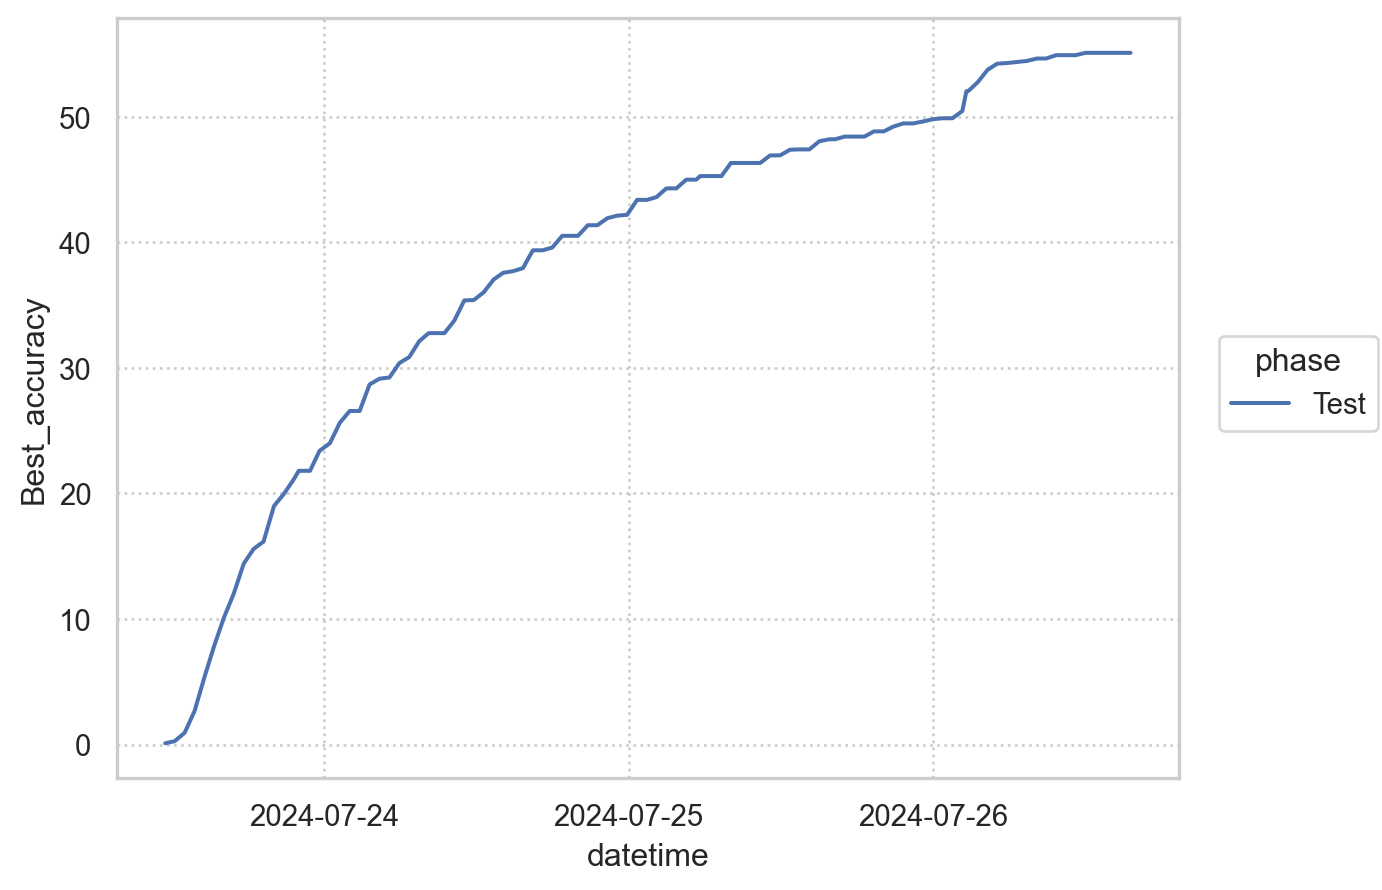

In [86]:
(
    so.Plot(tb[tb["phase"]=="Test"].reset_index(), x="datetime", y="Best_accuracy", color="phase")
    .add(so.Line())
)

In [87]:
def get_energy_cumsum(row):
    timestamp = row["datetime"]
    energy_kWh = (energy[energy["datetime"]<timestamp]["interval(sec)"]*energy[energy["datetime"]<timestamp]["tot inst power (mW)"]/1000).sum()/3600/1000
    return energy_kWh

tb["energy_cumsum"] = tb.apply(get_energy_cumsum, axis=1)

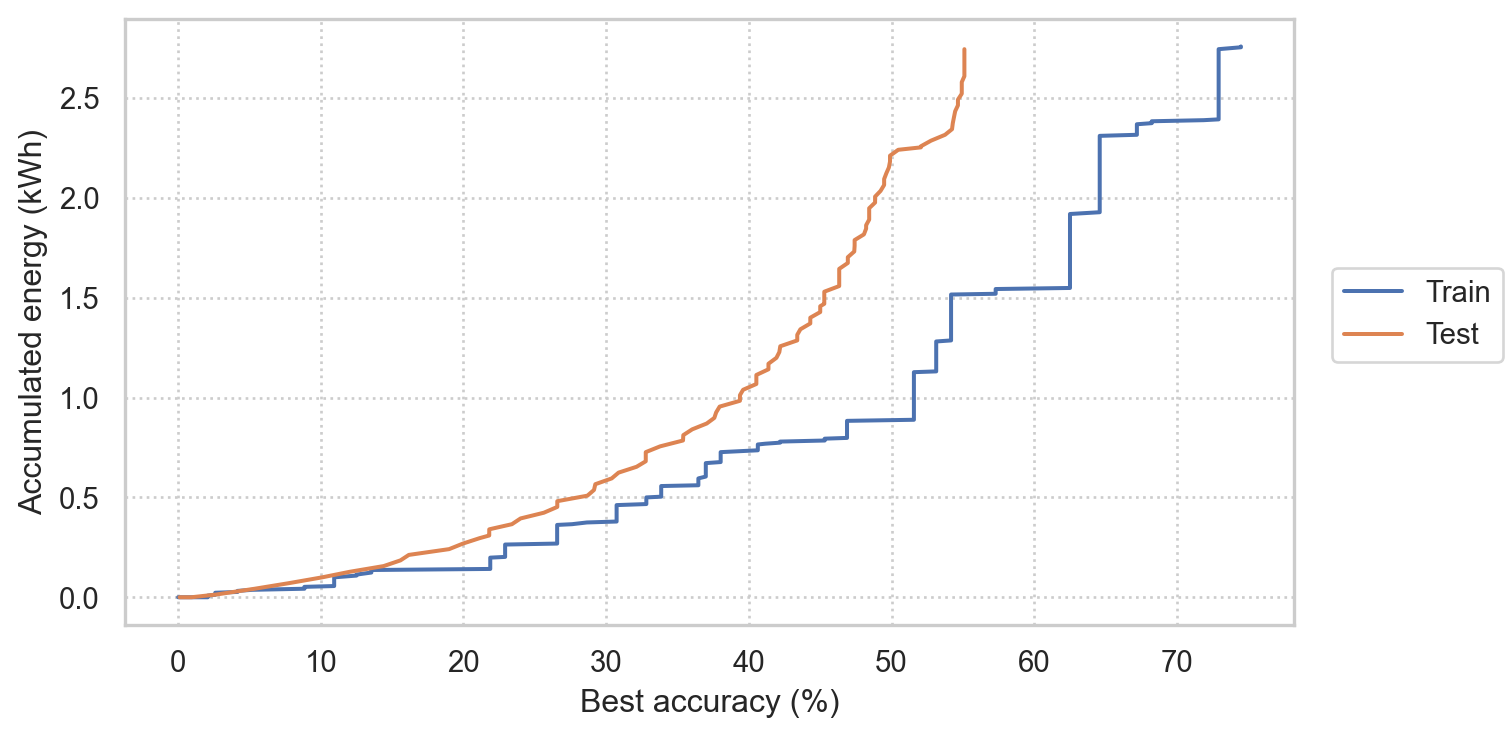

In [88]:
f = plt.Figure(figsize=(7, 4))
(
    so.Plot(tb.reset_index(), x="Best_accuracy", y="energy_cumsum", color="phase")
    .add(so.Line())
    .on(f)
    .theme(theme_dict)
    .label(
        x="Best accuracy (%)",
        y = "Accumulated energy (kWh)",
        color=None,
    )
    .layout(engine="tight")
    # .layout(engine="constrained")
)

In [108]:
tb[tb["phase"]=="Train"].reset_index()

,index,step,timestamp,accuracy,phase,datetime,Best_accuracy,energy_cumsum
0,0,1,1.721734e+09,0.000000,Train,2024-07-23 11:29:04,0.000000,0.000000
1,1,101,1.721735e+09,0.000000,Train,2024-07-23 11:44:00,0.000000,0.000000
2,2,201,1.721735e+09,0.000000,Train,2024-07-23 11:50:24,0.000000,0.000000
3,3,301,1.721736e+09,0.520833,Train,2024-07-23 11:58:56,0.520833,0.000000
4,4,401,1.721736e+09,0.520833,Train,2024-07-23 12:07:28,0.520833,0.000000
...,...,...,...,...,...,...,...,...
489,489,48012,1.722007e+09,68.229172,Train,2024-07-26 15:17:20,72.916672,2.733848
490,490,48112,1.722008e+09,67.708336,Train,2024-07-26 15:25:52,72.916672,2.739393
491,491,48212,1.722008e+09,69.791672,Train,2024-07-26 15:34:24,72.916672,2.744816
492,492,48312,1.722009e+09,74.479172,Train,2024-07-26 15:49:20,74.479172,2.754306


/Users/mathildepro/miniforge3/envs/energy_analysis/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1500x800 with 0 Axes>

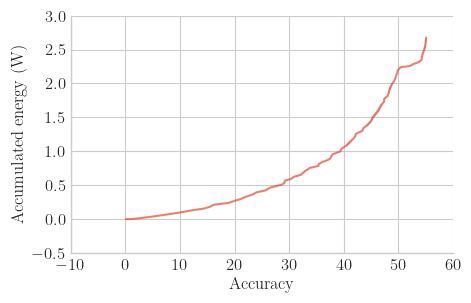

In [112]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.style.use('seaborn-v0_8-whitegrid')

tex_fonts = {
    # Use LaTeX to write all text
    "text.usetex": True,
    "font.family": "serif",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 10,
    "font.size": 10,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 8,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8
}

plt.rcParams.update(tex_fonts)

plt.figure(figsize=(15,8))
ax = sns.relplot(
    x="Best_accuracy", y="energy_cumsum",
    data=tb[tb["phase"]=="Test"].reset_index(), 
    kind="line", 
    # palette="colorbl",
    height=3, aspect=12/8,alpha=0.7,
    )# ax.set(title="Power consumption of dlrm training")
# ax._legend.remove()
FONTSIZE = 12
ax.set_xlabels("Accuracy", fontsize=FONTSIZE)
ax.set_ylabels("Accumulated energy (W)", fontsize=FONTSIZE)
ax.set_xticklabels(fontsize=FONTSIZE)
ax.set_yticklabels(fontsize=FONTSIZE)
graph_dir = "/Users/mathildepro/Documents/code_projects/ai-energy-consumption-framework/Jetson/graphs/"
ax.savefig(f"{graph_dir}/accuracy.pdf", dpi=300)

In [94]:
log_dir = "/Users/mathildepro/Documents/code_projects/ai-energy-consumption-framework/Jetson/logs"
tb[tb["phase"]=="Test"].reset_index().to_csv(log_dir + "/20240723_132409/" + "tb_energycumsum.csv")